In [5]:
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent.parent.resolve())

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

from vinasmol.hfmodel import LUCIE
from vinasmol.tokenization.language import (
    token_language_classification,
    classification_model_name,
)

In [76]:
df = token_language_classification(LUCIE, batch_size=128)

Device set to use cuda:0


In [92]:
df

,token,cleaned,token_id,lang,score
0,valuate,valuate,52249,en-US,0.898486
1,▁Mey,Mey,23039,af-ZA,0.978905
2,ogra,ogra,4044,is-IS,0.997742
3,▁Bourgeois,Bourgeois,48623,fr-FR,0.999973
4,▁urg,urg,12651,ro-RO,0.361903
...,...,...,...,...,...
65012,ützen,ützen,23585,de-DE,0.999928
65013,push,push,9380,ms-MY,0.333694
65014,""",$",""",$",61218,km-KH,0.995100
65015,René,René,57283,fr-FR,0.980238


In [101]:
threshold = 0.5
other_cat = f'other (< {threshold})'

In [ ]:
confident_predictions = df[df['score'] > threshold]
training_languages = ['fr-FR', 'en-US', 'de-DE', 'es-ES', 'it-IT']
confident_predictions['lang'][~confident_predictions['lang'].isin(training_languages)] = other_cat

In [115]:
lang_counts = confident_predictions['lang'].value_counts().to_frame().reset_index()
lang_counts

,lang,count
0,other (< 0.5),23494
1,fr-FR,11899
2,en-US,8037
3,de-DE,3991
4,es-ES,2435
5,it-IT,1805


In [118]:
num_confident = len(confident_predictions)
num_other = lang_counts[lang_counts['lang'] == other_cat]['count'][0]
print(f"Vocabulary size: {len(df)}")
print(f"Tokens confidently classified (> {threshold}): {num_confident}")
print(f"Tokens confidently classified in training languages (> {threshold}): {num_confident - num_other}")

Vocabulary size: 65017
Tokens confidently classified (> 0.5): 51661
Tokens confidently classified in training languages (> 0.5): 28167


In [119]:
confident_predictions[confident_predictions['lang'] == other_cat]

,token,cleaned,token_id,lang,score
1,▁Mey,Mey,23039,other (< 0.5),0.978905
2,ogra,ogra,4044,other (< 0.5),0.997742
6,▁Lamp,Lamp,21955,other (< 0.5),0.589951
11,▁dite,dite,14219,other (< 0.5),0.555196
12,=-,=-,25414,other (< 0.5),0.732356
...,...,...,...,...,...
65005,▁}));,}));,52904,other (< 0.5),0.907403
65007,tick,tick,15272,other (< 0.5),0.901303
65010,▁Vign,Vign,36111,other (< 0.5),0.999420
65011,orov,orov,52302,other (< 0.5),0.928896


Text(0.5, 1.0, 'Token language distribution in Lucie')

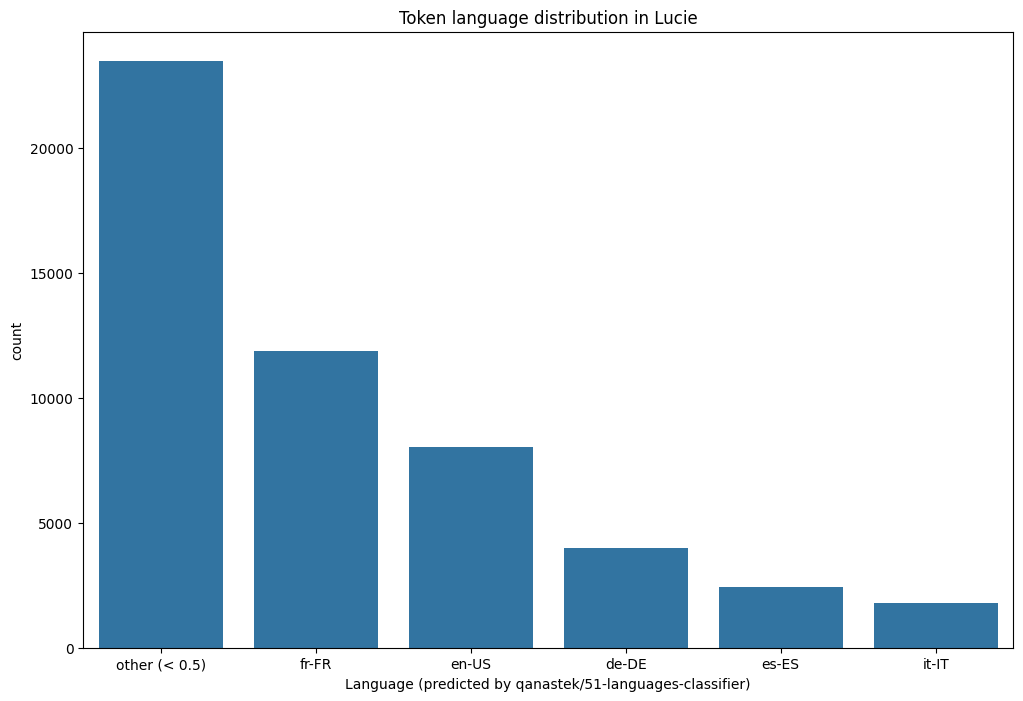

In [120]:
plt.figure(figsize=(12, 8))
sns.barplot(confident_predictions['lang'].value_counts())
plt.xlabel(f"Language (predicted by {classification_model_name})")
plt.title(f"Token language distribution in {LUCIE.friendly_name}")

Text(0.5, 1.0, 'Classifier score distribution')

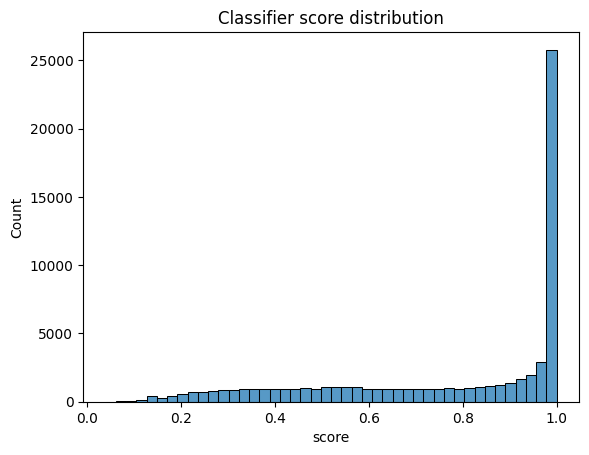

In [121]:
sns.histplot(df, x='score')
plt.title("Classifier score distribution")